# second attempt - reverse prediction with radii

In [42]:
import numpy as np
import pandas as pd
from functions import *
from read_from_file_df import *
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [43]:
def find_loc(pixel, size):
    pixel = pixel-1
    x = pixel // size
    y = pixel % size
    return (x,y)

In [44]:
def calc_neighs(field, i, j,size, radii = 1):
    """ Calculate number of neighbors alive (assuming square field) """
    neighs = 0
    M = generate_twice_tuples(radii)
    for m in M:
        row_idx = m[0] + i
        col_idx = m[1] + j
        if row_idx<0: row_idx+=size
        if col_idx<0: col_idx+=size
        if row_idx>=size: row_idx-=size
        if col_idx>=size: col_idx-=size
        if field[row_idx*size+col_idx]:
            neighs += 1
    return neighs

In [45]:
def to_show(board,size):
    table = np.zeros((size, size, 3))
    for index, col in enumerate(board):
        color = int(board[col]) * -1 + 1
        i = index // size
        j = index % size
        table[i, j] = [color, color, color]
    return table

In [46]:
SIZE = 4
AMOUNT_BOARDS = 100000
AMOUNT_MOVES = 100
NUM_DICT = 1

In [47]:
gen = 3
size = SIZE
name_df = f'{PATH_DF}\\{size}size_{AMOUNT_BOARDS}boards_{gen}gen_non-reverse'
reverse_df = pd.read_pickle(f'{name_df}.pkl')

In [48]:
new_columns = [f'Col_{i}' for i in range(1, gen*SIZE*SIZE + 1)]
reverse_df_sort = reverse_df.sort_values(by = new_columns).reset_index(drop=True)
for i in reverse_df_sort.columns:
    reverse_df_sort[i] = reverse_df_sort[i].astype(int)

In [49]:
pixel = 17
radii = 1
loc = find_loc(pixel, size)
print(loc)

(4, 0)


In [50]:
reverse_df['radius1'] = reverse_df.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
reverse_df['radius2'] = reverse_df.apply(lambda row: calc_neighs(row[size*size:size*size*2],loc[0], loc[1],size,radii ), axis=1)
reverse_df['radius3'] = reverse_df.apply(lambda row: calc_neighs(row[size*size*2:],loc[0], loc[1],size,radii ), axis=1)

C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


In [51]:
reverse_df

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_42,Col_43,Col_44,Col_45,Col_46,Col_47,Col_48,radius1,radius2,radius3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,5,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,4
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,2,2,2
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,3,2,3
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,4,4,2
1305,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,7,2,0
1306,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,6,1,0
1307,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,5,0,0


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\3009459553.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


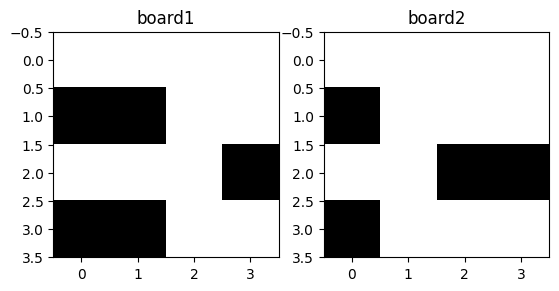

In [52]:
num_board = 200

board1 = reverse_df.iloc[[num_board],0:size*size]
board2 = reverse_df.iloc[[num_board],size*size:size*size*2]

board1_to_show = to_show(board1,size)
board2_to_show = to_show(board2,size)
fig, axes = plt.subplots(1, 2)

axes[0].imshow(board1_to_show)
axes[0].set_title('board1')

axes[1].imshow(board2_to_show)
axes[1].set_title('board2')

plt.show()

In [53]:
reverse_df

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_42,Col_43,Col_44,Col_45,Col_46,Col_47,Col_48,radius1,radius2,radius3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,5,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,4
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,2,2,2
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,3,2,3
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,0,0,4,4,2
1305,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,7,2,0
1306,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,6,1,0
1307,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,5,0,0


In [54]:
# Step 1: Prepare Data
amount_features = (gen-1)*size*size #the previous boards
features = reverse_df_sort.iloc[:, :amount_features]

name_col = 'Col_' + str(amount_features + 1)  # Target: the first pixel in the board
target = reverse_df_sort[name_col]

#TODO: add general code for any amount of gen
features['radius1'] = features.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
features['radius2'] = features.apply(lambda row: calc_neighs(row[size*size:],loc[0], loc[1],size,radii ), axis=1)

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=365)

print("len x train: ", len(X_train))
print("len x test: ",len(X_test))
print("len y train: ",len(y_train))
print("len y test: ",len(y_test))

dt = tree.DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)

print(dt.tree_.node_count, dt.tree_.max_depth)
train_test_full_error

C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


len x train:  1178
len x test:  131
len y train:  1178
len y test:  131
9 4


,train,test
accuracy,1.0,1.0
precision,1.0,1.0
recall,1.0,1.0
f1,1.0,1.0


In [55]:
depth_to_check = [4,5,6,7,8,9,10,15,20,30,50,100]

for i in depth_to_check:
    dt, node_count, max_depth, train_test_full_error  = dec_tree_df(X_train,y_train, X_test, y_test, i, 42)
    
    name_file = f"{PATH_MODELS}\\reverse_model2\\{SIZE}\\decision_tree_size{SIZE}_reverse_df_model2_{str(i)}.pkl"
    with open(name_file, 'wb') as file:
        pickle.dump(dt, file)
    
    print(node_count, max_depth)
    print(train_test_full_error)

9 4
           train  test
accuracy     1.0   1.0
precision    1.0   1.0
recall       1.0   1.0
f1           1.0   1.0
9 4
           train  test
accuracy     1.0   1.0
precision    1.0   1.0
recall       1.0   1.0
f1           1.0   1.0
9 4
           train  test
accuracy     1.0   1.0
precision    1.0   1.0
recall       1.0   1.0
f1           1.0   1.0
9 4
           train  test
accuracy     1.0   1.0
precision    1.0   1.0
recall       1.0   1.0
f1           1.0   1.0
9 4
           train  test
accuracy     1.0   1.0
precision    1.0   1.0
recall       1.0   1.0
f1           1.0   1.0
9 4
           train  test
accuracy     1.0   1.0
precision    1.0   1.0
recall       1.0   1.0
f1           1.0   1.0
9 4
           train  test
accuracy     1.0   1.0
precision    1.0   1.0
recall       1.0   1.0
f1           1.0   1.0
9 4
           train  test
accuracy     1.0   1.0
precision    1.0   1.0
recall       1.0   1.0
f1           1.0   1.0
9 4
           train  test
accuracy     1.0   1.

In [56]:
amount_features = (gen-1)* SIZE*SIZE #the previous boards
features = reverse_df_sort.iloc[:, :amount_features]
for i in range(SIZE*SIZE): # to any pixel in the expected board
    name_col = 'Col_' + str(i+amount_features + 1)
    target = reverse_df_sort[name_col]
    
    #TODO: add general code for any amount of gen
    loc = find_loc(pixel+1, size)
    features['radius1'] = features.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
    features['radius2'] = features.apply(lambda row: calc_neighs(row[size*size:],loc[0], loc[1],size,radii ), axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=613)
    dt, node_count, max_depth, train_test_full_error  = dec_tree_df(X_train,y_train, X_test, y_test, 10, 42)
    name_file = f"{PATH_MODELS}\\reverse2\\{SIZE}\\dt_size{SIZE}_r2_pixel_{str(i+1)}.pkl"
    with open(name_file, 'wb') as file:
        pickle.dump(dt, file)
    print(i)
    print(node_count, max_depth)
    print(train_test_full_error)

C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


0
331 10
              train      test
accuracy   0.973684  0.793893
precision  0.948640  0.680851
recall     0.957317  0.727273
f1         0.952959  0.703297


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


1
9 4
           train  test
accuracy     1.0   1.0
precision    1.0   1.0
recall       1.0   1.0
f1           1.0   1.0


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


2
297 10
              train      test
accuracy   0.961800  0.740458
precision  0.969799  0.657143
recall     0.889231  0.511111
f1         0.927769  0.575000


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


3
231 10
              train      test
accuracy   0.962649  0.893130
precision  0.938272  0.868421
recall     0.926829  0.785714
f1         0.932515  0.825000


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


4
361 10
              train      test
accuracy   0.967742  0.755725
precision  0.960123  0.500000
recall     0.926036  0.500000
f1         0.942771  0.500000


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


5
309 10
              train      test
accuracy   0.973684  0.816794
precision  0.971787  0.724138
recall     0.933735  0.567568
f1         0.952381  0.636364


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


6
451 10
              train      test
accuracy   0.975382  0.717557
precision  0.981424  0.361111
recall     0.932353  0.481481
f1         0.956259  0.412698


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


7
267 10
              train      test
accuracy   0.935484  0.763359
precision  0.875706  0.447368
recall     0.906433  0.629630
f1         0.890805  0.523077


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


8
269 10
              train      test
accuracy   0.932937  0.839695
precision  0.900000  0.694444
recall     0.859701  0.714286
f1         0.879389  0.704225


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


9
285 10
              train      test
accuracy   0.965195  0.809160
precision  0.967532  0.714286
recall     0.905775  0.625000
f1         0.935636  0.666667


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


10
259 10
              train      test
accuracy   0.922750  0.816794
precision  0.884244  0.694444
recall     0.833333  0.657895
f1         0.858034  0.675676


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


11
187 10
              train      test
accuracy   0.940577  0.885496
precision  0.940000  0.763158
recall     0.844311  0.828571
f1         0.889590  0.794521


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


12
335 10
              train      test
accuracy   0.960951  0.732824
precision  0.937126  0.456522
recall     0.926036  0.677419
f1         0.931548  0.545455


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


13
307 10
              train      test
accuracy   0.966893  0.870229
precision  0.971338  0.757576
recall     0.910448  0.735294
f1         0.939908  0.746269


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


14
361 10
              train      test
accuracy   0.972835  0.732824
precision  0.971963  0.481481
recall     0.931343  0.382353
f1         0.951220  0.426230


C:\Users\דרור\AppData\Local\Temp\ipykernel_19764\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


15
305 10
              train      test
accuracy   0.935484  0.801527
precision  0.906542  0.558824
recall     0.863501  0.633333
f1         0.884498  0.593750
